In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

In [11]:
#データを取得
df22_1s = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset22.csv")
df22_2s = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset22.csv")
df22_3s = pd.read_csv("./取得データセット/受信機3/nkmr3-dataset22.csv")
df22_4s = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset22.csv")

#それぞれのカラムを設定
df22_1s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df22_2s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df22_3s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df22_4s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

df_s = df22_1s.append(df22_2s).append(df22_3s).append(df22_4s)

#print(df)

#同期ビーコンのid
set_uuid = "1000000007ae1001b000001c4d8dffff"

#送信機のid
id1 = "10000000aaaa41441111110000000000"
id2 = "20000000aaaa41441111110000000000"
id3 = "30000000aaaa41441111110000000000"
id4 = "40000000aaaa41441111110000000000"
id5 = "50000000aaaa41441111110000000000"
id6 = "60000000aaaa41441111110000000000"
id7 = "70000000aaaa41441111110000000000"
id8 = "80000000aaaa41441111110000000000" 
id9 = "90000000aaaa41441111110000000000"
id10 = "a0000000aaaa41441111110000000000"

#locateを作成
df_s["locate"] = 0
df_s.locate = df_s.locate.where(df_s.UUIDs != id1,1)
df_s.locate = df_s.locate.where(df_s.UUIDs != id2,2)
df_s.locate = df_s.locate.where(df_s.UUIDs != id3,3)
df_s.locate = df_s.locate.where(df_s.UUIDs != id4,4)
df_s.locate = df_s.locate.where(df_s.UUIDs != id5,5)
df_s.locate = df_s.locate.where(df_s.UUIDs != id6,6)
df_s.locate = df_s.locate.where(df_s.UUIDs != id7,7)
df_s.locate = df_s.locate.where(df_s.UUIDs != id8,8)
df_s.locate = df_s.locate.where(df_s.UUIDs != id9,9)
df_s.locate = df_s.locate.where(df_s.UUIDs != id10,10)
df_s.locate = df_s.locate.astype(int)

#deviceを作成
df_s["device"] = 0
df_s.device = df_s.device.where(df_s.device_name != "rasp1",1)
df_s.device = df_s.device.where(df_s.device_name != "nkmr-2",2)
df_s.device = df_s.device.where(df_s.device_name != "rasp3",3)
df_s.device = df_s.device.where(df_s.device_name != "nkmr-4",4)

#座標を与える
df_s["x"] = 0
df_s["y"] = 0
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id1,0),df_s.y.where(df_s.UUIDs != id1,1500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id2,0),df_s.y.where(df_s.UUIDs != id2,1000)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id3,0),df_s.y.where(df_s.UUIDs != id3,500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id4,450),df_s.y.where(df_s.UUIDs != id4,2000)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id5,450),df_s.y.where(df_s.UUIDs != id5,1320)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id6,450),df_s.y.where(df_s.UUIDs != id6,660)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id7,450),df_s.y.where(df_s.UUIDs != id7,0)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id8,900),df_s.y.where(df_s.UUIDs != id8,1500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id9,900),df_s.y.where(df_s.UUIDs != id9,1000)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id10,900),df_s.y.where(df_s.UUIDs != id10,500)

#発信機ごとに分ける
df_1 = df_s[(df_s.UUIDs == id1) | (df_s.UUIDs == set_uuid)]
df_2 = df_s[(df_s.UUIDs == id2) | (df_s.UUIDs == set_uuid)]
df_3 = df_s[(df_s.UUIDs == id3) | (df_s.UUIDs == set_uuid)]
df_4 = df_s[(df_s.UUIDs == id4) | (df_s.UUIDs == set_uuid)]
df_5 = df_s[(df_s.UUIDs == id5) | (df_s.UUIDs == set_uuid)]
df_6 = df_s[(df_s.UUIDs == id6) | (df_s.UUIDs == set_uuid)]
df_7 = df_s[(df_s.UUIDs == id7) | (df_s.UUIDs == set_uuid)]
df_8 = df_s[(df_s.UUIDs == id8) | (df_s.UUIDs == set_uuid)]
df_9 = df_s[(df_s.UUIDs == id9) | (df_s.UUIDs == set_uuid)]
df_10 = df_s[(df_s.UUIDs == id10) | (df_s.UUIDs == set_uuid)]

df_list = [df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10]

In [22]:
df22_1s

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y
0,30000000aaaa41441111110000000000,2,34,1.691564,near,-78,-89,rasp1,2018/02/07 10:30:53,200,200
1,1000000007ae1001b000001c4d8dffff,8192,2,0.174261,immediate,-128,-68,rasp1,2018/02/07 10:30:53,200,200
2,1000000007ae1001b000001c4d8dffff,8192,2,0.179410,immediate,-128,-69,rasp1,2018/02/07 10:30:53,200,200
3,90000000aaaa41441111110000000000,2,33,1.397251,near,-78,-85,rasp1,2018/02/07 10:30:53,200,200
4,10000000aaaa41441111110000000000,2,38,1.000000,near,-78,-78,rasp1,2018/02/07 10:30:53,200,200
5,40000000aaaa41441111110000000000,2,35,2.148106,near,-78,-94,rasp1,2018/02/07 10:30:53,200,200
6,60000000aaaa41441111110000000000,2,39,2.479227,near,-78,-97,rasp1,2018/02/07 10:30:53,200,200
7,50000000aaaa41441111110000000000,2,32,1.146102,near,-82,-85,rasp1,2018/02/07 10:30:53,200,200
8,80000000aaaa41441111110000000000,2,37,1.691564,near,-78,-89,rasp1,2018/02/07 10:30:53,200,200
9,30000000aaaa41441111110000000000,2,34,1.332051,near,-78,-84,rasp1,2018/02/07 10:30:53,200,200


### 前処理用のモジュールの読み込み

In [3]:
import preprocessing as pre

point2の平均値:-86.9839883551674
point3の平均値:-88.57282552753475

point4の平均値:-84.26371308016877
point5の平均値:-89.635807860262
point6の平均値:-91.09749839640796
point7の平均値:-84.32159769404983

point8の平均値:-91.35427135678393
point9の平均値:-90.55958549222798
point10の平均値:-88.60146699266504


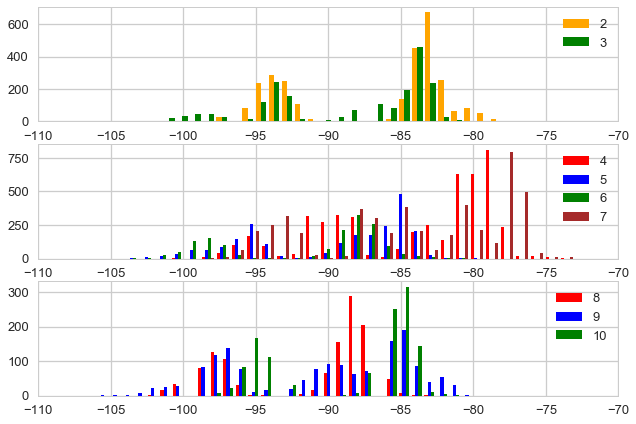

In [27]:
#fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,7))

plt.subplot(3,1,1)
labels=["2","3"]
colors=["orange","green"]
x1 = [df_list[0][(df_list[0].device == 1)&(df_list[0].locate == 2)]["RSSI"],\
     df_list[1][(df_list[1].device == 1)&(df_list[1].locate == 3)]["RSSI"]]
plt.hist(x1,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

plt.subplot(3,1,2)
labels=["4","5","6","7"]
colors=["red","blue","green","brown"]
x2 = [df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)]["RSSI"],\
     df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)]["RSSI"],\
     df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)]["RSSI"],\
     df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)]["RSSI"]]
plt.hist(x2,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

plt.subplot(3,1,3)
labels=["8","9","10"]
colors=["red","blue","green"]
x3 = [df_list[6][(df_list[6].device == 1)&(df_list[6].locate == 8)]["RSSI"],\
     df_list[7][(df_list[7].device == 1)&(df_list[7].locate == 9)]["RSSI"],\
     df_list[8][(df_list[8].device == 1)&(df_list[8].locate == 10)]["RSSI"]]
plt.hist(x3,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

#sns.distplot(df_list[0][df_list[0].device == 1]["RSSI"],hist=True,color="blue",kde_kws={"label": "point2"},ax=ax1)
#sns.distplot(df_list[1][df_list[1].device == 1]["RSSI"],hist=True,color="green",kde_kws={"label": "point3"},ax=ax1)

#sns.distplot(df_list[2][df_list[2].device == 1]["RSSI"],hist=False,color="red",kde_kws={"label": "point4"},ax=ax2)
#sns.distplot(df_list[3][df_list[3].device == 1]["RSSI"],hist=False,color="blue",kde_kws={"label": "point5"},ax=ax2)
#sns.distplot(df_list[4][df_list[4].device == 1]["RSSI"],hist=False,color="green",kde_kws={"label": "point6"},ax=ax2)
#sns.distplot(df_list[5][df_list[5].device == 1]["RSSI"],hist=False,color="brown",kde_kws={"label": "point7"},ax=ax2)

#sns.distplot(df_list[6][df_list[6].device == 1]["RSSI"],hist=False,color="red",kde_kws={"label": "point8"},ax=ax3)
#sns.distplot(df_list[7][df_list[7].device == 1]["RSSI"],hist=False,color="blue",kde_kws={"label": "point9"},ax=ax3)
#sns.distplot(df_list[8][df_list[8].device == 1]["RSSI"],hist=False,color="green",kde_kws={"label": "point10"},ax=ax3)

print("point2の平均値:%s" % df_list[0][(df_list[0].device == 1)&(df_list[0].locate == 2)].RSSI.mean())
print("point3の平均値:%s\n" % df_list[1][(df_list[1].device == 1)&(df_list[1].locate == 3)].RSSI.mean())
print("point4の平均値:%s" % df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)].RSSI.mean())
print("point5の平均値:%s" % df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)].RSSI.mean())
print("point6の平均値:%s" % df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)].RSSI.mean())
print("point7の平均値:%s\n" % df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)].RSSI.mean())
print("point8の平均値:%s" % df_list[6][(df_list[6].device == 1)&(df_list[6].locate == 8)].RSSI.mean())
print("point9の平均値:%s" % df_list[7][(df_list[7].device == 1)&(df_list[7].locate == 9)].RSSI.mean())
print("point10の平均値:%s" % df_list[8][(df_list[8].device == 1)&(df_list[8].locate == 10)].RSSI.mean())

### キャリブレーションを行ったグラフ

In [28]:
cali_list = [1.05, 1.0, 0.96, 0.98, 0.93, 0.96, 1.05, 1.0, 0.99, 1.04]
for i in range(len(df_list)):
    df_list[i].RSSI = df_list[i].RSSI*cali_list[i+1]

/Users/tomanan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


point2の平均値:-86.9839883551674
point3の平均値:-85.02991250643346

point4の平均値:-82.57843881856553
point5の平均値:-83.36130131004359
point6の平均値:-87.45359846055145
point7の平均値:-88.53767757875289

point8の平均値:-91.35427135678393
point9の平均値:-89.65398963730527
point10の平均値:-92.14552567237155


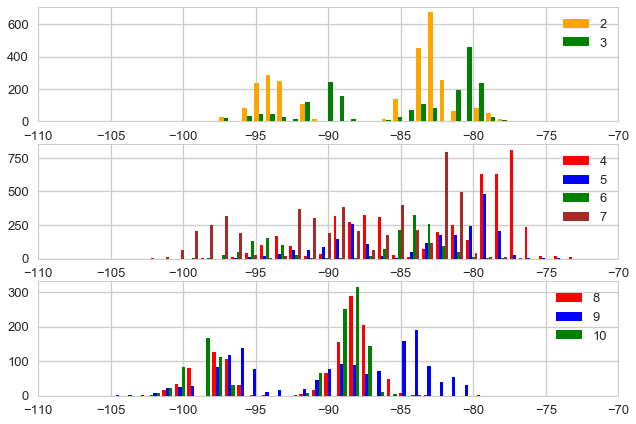

In [29]:
#平均値
print("point2の平均値:%s" % df_list[0][(df_list[0].device == 1)&(df_list[0].locate == 2)].RSSI.mean())
print("point3の平均値:%s\n" % df_list[1][(df_list[1].device == 1)&(df_list[1].locate == 3)].RSSI.mean())
print("point4の平均値:%s" % df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)].RSSI.mean())
print("point5の平均値:%s" % df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)].RSSI.mean())
print("point6の平均値:%s" % df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)].RSSI.mean())
print("point7の平均値:%s\n" % df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)].RSSI.mean())
print("point8の平均値:%s" % df_list[6][(df_list[6].device == 1)&(df_list[6].locate == 8)].RSSI.mean())
print("point9の平均値:%s" % df_list[7][(df_list[7].device == 1)&(df_list[7].locate == 9)].RSSI.mean())
print("point10の平均値:%s" % df_list[8][(df_list[8].device == 1)&(df_list[8].locate == 10)].RSSI.mean())

#グラフ表示
plt.subplot(3,1,1)
labels=["2","3"]
colors=["orange","green"]
x1 = [df_list[0][(df_list[0].device == 1)&(df_list[0].locate == 2)]["RSSI"],\
     df_list[1][(df_list[1].device == 1)&(df_list[1].locate == 3)]["RSSI"]]
plt.hist(x1,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

plt.subplot(3,1,2)
labels=["4","5","6","7"]
colors=["red","blue","green","brown"]
x2 = [df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)]["RSSI"],\
     df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)]["RSSI"],\
     df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)]["RSSI"],\
     df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)]["RSSI"]]
plt.hist(x2,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

plt.subplot(3,1,3)
labels=["8","9","10"]
colors=["red","blue","green"]
x3 = [df_list[6][(df_list[6].device == 1)&(df_list[6].locate == 8)]["RSSI"],\
     df_list[7][(df_list[7].device == 1)&(df_list[7].locate == 9)]["RSSI"],\
     df_list[8][(df_list[8].device == 1)&(df_list[8].locate == 10)]["RSSI"]]
plt.hist(x3,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

/Users/tomanan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


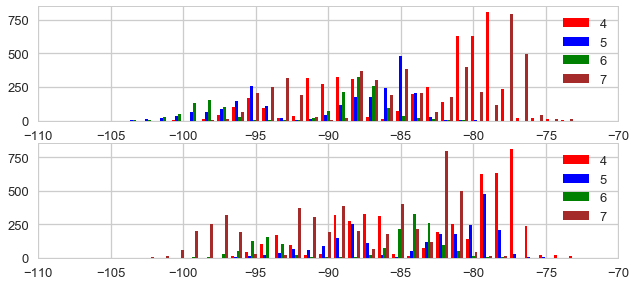

In [31]:
plt.subplot(3,1,1)
labels=["4","5","6","7"]
colors=["red","blue","green","brown"]
x2 = [df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)]["RSSI"],\
     df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)]["RSSI"],\
     df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)]["RSSI"],\
     df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)]["RSSI"]]
plt.hist(x2,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

cali_list = [1.05, 1.0, 0.96, 0.98, 0.93, 0.96, 1.05, 1.0, 0.99, 1.04]
for i in range(len(df_list)):
    df_list[i].RSSI = df_list[i].RSSI*cali_list[i+1]

plt.subplot(3,1,2)
labels=["4","5","6","7"]
colors=["red","blue","green","brown"]
x2 = [df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)]["RSSI"],\
     df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)]["RSSI"],\
     df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)]["RSSI"],\
     df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)]["RSSI"]]
plt.hist(x2,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

### 時刻合わせ

In [14]:
#時刻合わせ
for (i,df) in enumerate(df_list):
    df_list[i] = pre.set_time(df,set_uuid)

In [15]:
df_list[0]

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device,time
3,20000000aaaa41441111110000000000,2,40,2.047870,near,-78,-93,nkmr-2,2018/02/10 06:31:47,0,1000,2,2,2
15,20000000aaaa41441111110000000000,2,40,2.727867,near,-78,-99,nkmr-2,2018/02/10 06:31:47,0,1000,2,2,2
15,20000000aaaa41441111110000000000,2,40,1.691564,near,-78,-89,rasp3,2018/02/12 09:32:11,0,1000,2,3,2
18,20000000aaaa41441111110000000000,2,40,2.253249,near,-78,-95,rasp1,2018/02/07 10:30:53,0,1000,2,1,3
20,20000000aaaa41441111110000000000,2,40,1.269894,near,-78,-83,nkmr-2,2018/02/10 06:31:47,0,1000,2,2,3
22,20000000aaaa41441111110000000000,2,40,1.269894,near,-78,-83,rasp1,2018/02/07 10:30:53,0,1000,2,1,3
26,20000000aaaa41441111110000000000,2,40,2.600577,near,-78,-98,rasp3,2018/02/12 09:32:11,0,1000,2,3,3
27,20000000aaaa41441111110000000000,2,40,2.363539,near,-78,-96,rasp1,2018/02/07 10:30:53,0,1000,2,1,3
32,20000000aaaa41441111110000000000,2,40,1.269894,near,-78,-83,rasp1,2018/02/07 10:30:54,0,1000,2,1,3
35,20000000aaaa41441111110000000000,2,40,1.612630,near,-78,-88,rasp3,2018/02/12 09:32:11,0,1000,2,3,3


### 直接波と反射波を識別する

In [62]:
#直接波と反射波の識別
df_list = pre.make_cluster(df_list,["RSSI","locate"])

### 1秒ごとのRSSIの平均値を取る

In [8]:
#時刻毎のRSSIの平均値を格納
train_df = pd.DataFrame()
column_name = ["dev1","dev2","dev3","dev4","time","locate","x","y","cluster"]
#column_name = ["dev1","dev2","dev3","dev4","time","locate","cluster"]
time_max = pre.max_value(df_list)

for df in df_list:
    locate = df["locate"].iloc[1]
    x = df["x"].iloc[1]
    y = df["y"].iloc[1]
    mid_df = pre.get_mean(df,column_name,locate,x,y,time_max)
    train_df = pd.concat([train_df,mid_df])

In [9]:
#NANのある行を削除し、time,locate,x,y,clusterをintに変換
direct = train_df[train_df.cluster == 0].dropna(thresh=4).interpolate().dropna()
reflect = train_df[train_df.cluster == 1].dropna(thresh=4).interpolate().dropna()
#direct = train_df[train_df.cluster == 0].fillna(method='ffill')
#reflect = train_df[train_df.cluster == 1].fillna(method='ffill')
#direct = train_df[train_df.cluster == 0]
#reflect = train_df[train_df.cluster == 1]
train = pd.concat([direct,reflect])
train.locate = train.locate.astype("int")
train.time = train.time.astype("int")
train.x = train.x.astype("int")
train.y = train.y.astype("int")
train.cluster = train.cluster.astype("int")
#train.dev3 = train.dev3.where(train.locate != 1,train.dev3[train.locate == 10].iloc[0:train.dev1[train.locate == 1].count()])
#train.dev3[train.locate == 10].iloc[0:train.dev1[train.locate == 1].count()]
#train.dev1[train.locate == 1]
#train

In [101]:
train2 = pd.read_csv("./加工データセット/gym_train.csv")
train2.locate = train2.locate.astype("int")
train2.time = train2.time.astype("int")
train2.x = train2.x.astype("int")
train2.y = train2.y.astype("int")
train2.cluster = train2.cluster.astype("int")
#train2.drop("Unnamed: 0",axis = 1)

,dev1,dev2,dev3,dev4,time,locate,x,y,cluster
0,-91.000000,-73.333333,-86.000000,-81.000000,5,1,0,1500,0
1,-92.000000,-76.000000,-82.333333,-84.000000,6,1,0,1500,0
2,-90.500000,-76.000000,-82.666667,-83.000000,7,1,0,1500,0
3,-91.000000,-76.000000,-83.000000,-82.000000,8,1,0,1500,0
4,-91.333333,-75.000000,-86.000000,-81.000000,9,1,0,1500,0
5,-91.000000,-75.500000,-83.500000,-83.500000,10,1,0,1500,0
6,-90.666667,-73.000000,-79.500000,-84.500000,11,1,0,1500,0
7,-90.000000,-74.750000,-79.666667,-83.333333,12,1,0,1500,0
8,-92.000000,-76.500000,-79.083333,-82.166667,13,1,0,1500,0
9,-92.000000,-76.500000,-78.500000,-81.000000,14,1,0,1500,0


In [32]:
#train

In [103]:
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 2,train[["dev1","dev2","dev3","dev4"]]*0.95)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 3,train[["dev1","dev2","dev3","dev4"]]*0.91)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 4,train[["dev1","dev2","dev3","dev4"]]*0.93)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 5,train[["dev1","dev2","dev3","dev4"]]*0.89)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 6,train[["dev1","dev2","dev3","dev4"]]*0.91)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 7,train[["dev1","dev2","dev3","dev4"]]*0.95)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 8,train[["dev1","dev2","dev3","dev4"]]*0.94)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 9,train[["dev1","dev2","dev3","dev4"]]*0.94)
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 10,train[["dev1","dev2","dev3","dev4"]]*0.99) 

### 学習用データ作成1

In [57]:
#学習用とテスト用に分ける
train_s = train[(train.locate != 5) & (train.locate != 6)] 
test_s =  train[(train.locate == 5) | (train.locate == 6)]
#train_s = train[(train.locate != 2) & (train.locate != 4) & (train.locate != 6) & (train.locate != 7) & (train.locate != 9)]
#test_s =  train[(train.locate == 2) | (train.locate == 4) | (train.locate == 6) | (train.locate == 7) | (train.locate == 9)]
#train_s = train[(train.locate != 4) & (train.locate != 6)]
#test_s =  train[(train.locate == 4) | (train.locate == 6)]
train_s.locate.astype("int")
train_s.time.astype("int")
train_s.x.astype("int")
train_s.y.astype("int")
train_s.cluster.astype("int")

14      0
16      0
18      0
20      0
22      0
24      0
26      0
28      0
30      0
32      0
34      0
36      0
38      0
40      0
42      0
44      0
46      0
48      0
50      0
52      0
54      0
56      0
58      0
60      0
62      0
64      0
66      0
68      0
70      0
72      0
       ..
2371    1
2373    1
2375    1
2377    1
2379    1
2381    1
2383    1
2385    1
2387    1
2389    1
2391    1
2393    1
2395    1
2397    1
2399    1
2401    1
2403    1
2405    1
2407    1
2409    1
2411    1
2413    1
2415    1
2417    1
2419    1
2421    1
2423    1
2425    1
2427    1
2429    1
Name: cluster, Length: 16999, dtype: int64

### 学習用データ作成2

In [11]:
train_s = test_s = train.sample(frac=1).reset_index(drop=True)
train_s = train_s.iloc[0:len(train)*3//4]
test_s =  test_s.iloc[len(train)*3//4:len(train)]
#train_s = train_s[(train_s.locate != 4) & (train_s.locate != 5) & (train_s.locate != 7) & (train_s.loacte != 

### 学習用データ作成3

In [75]:
train_s = train.sample(frac=1).reset_index(drop=True)
#train_s = train_s.iloc[0:len(train)*3//4]
test_s = train2.sample(frac=1).reset_index(drop=True)
test_s = test_s.iloc[0:len(train2)*2//4]
test_s = test_s[test_s.locate != 1]

### データセット(ラベルが座標)

In [12]:
from sklearn.utils import shuffle

# 学習用データセットを用意
train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
#train_x = np.array(train_s[["dev2","dev3","dev4","cluster"]])
#train_x = np.array(train_s[["dev1","dev3","cluster"]])
train_y = np.array(train_s[["x","y"]])
train_x,train_y = shuffle(train_x,train_y)
test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
#test_x = np.array(test_s[["dev2","dev3","dev4","cluster"]])
#test_x = np.array(test_s[["dev1","dev3","cluster"]])
test_y = np.array(test_s[["x","y"]])
test_x,test_y = shuffle(test_x,test_y)


# 教師データのx、yに分けたものを用意
train_y_x = np.array(train_s["x"])
test_y_x = np.array(test_s["x"])
train_y_y = np.array(train_s["y"])
test_y_y = np.array(test_s["y"])
train_y_x,train_y_y = shuffle(train_y_x,train_y_y)
test_y_x,test_y_y = shuffle(test_y_x,test_y_y)

### データセット(ラベルがlocate)

In [75]:
from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev2","dev3","dev4","cluster"]])
train_y = np.array(train_s[["locate"]])
train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev2","dev3","dev4","cluster"]])
test_y = np.array(test_s[["locate"]])
test_x,test_y = shuffle(test_x,test_y)

### ランダムフォレスト(回帰)

In [26]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier

model = RandomForestRegressor(max_depth=4,max_leaf_nodes=3,bootstrap=True,random_state=123,n_estimators=7)
#model = RandomForestClassifier()

reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

,pred_x,pred_y,answer_x,answer_y
0,499.492856,727.488112,0,1000
1,444.482208,1652.260670,900,1000
2,499.492856,727.488112,450,1320
3,499.492856,727.488112,0,1500
4,515.627341,1127.825473,0,1000
5,444.482208,1652.260670,450,660
6,499.492856,727.488112,900,1000
7,515.627341,1127.825473,450,0
8,499.492856,727.488112,450,1320
9,499.492856,727.488112,450,0


In [27]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:289.4107058544527
yの誤差の平均値:590.1778210526721
ユークリッド距離:657.319113617


### XGBoost(回帰)

In [91]:
#xの予測
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3)
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)
hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

#yの予測
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

ave1 = abs(hoge1.pred_x - hoge1.answer_x).mean()
ave2 = abs(hoge2.pred_y - hoge2.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:264.21148568602223
yの誤差の平均値:475.5701968826453
ユークリッド距離:544.035588295


In [92]:
a = np.sqrt((hoge1.pred_x - hoge1.answer_x)**2 + (hoge2.pred_y - hoge2.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge1.pred_x - hoge1.answer_x)**2 + (hoge2.pred_y - hoge2.answer_y)**2).astype(int)
a.sort()
print("誤差100m未満の精度:%s" % (b[(b < 100)].count()/hoge1.pred_x.count()))
print("誤差200m未満の精度:%s" % (b[(b < 200)].count()/hoge1.pred_x.count()))
print("誤差300m未満の精度:%s" % (b[(b < 300)].count()/hoge1.pred_x.count()))
print("誤差400m未満の精度:%s" % (b[(b < 400)].count()/hoge1.pred_x.count()))
print("誤差500m未満の精度:%s" % (b[(b < 500)].count()/hoge1.pred_x.count()))
print("全体の数:%d" % hoge1.pred_x.count())

誤差100m未満の精度:0.00054874702762
誤差200m未満の精度:0.00365831351747
誤差300m未満の精度:0.0974940552405
誤差400m未満の精度:0.254801536492
誤差500m未満の精度:0.359612218767
全体の数:5467


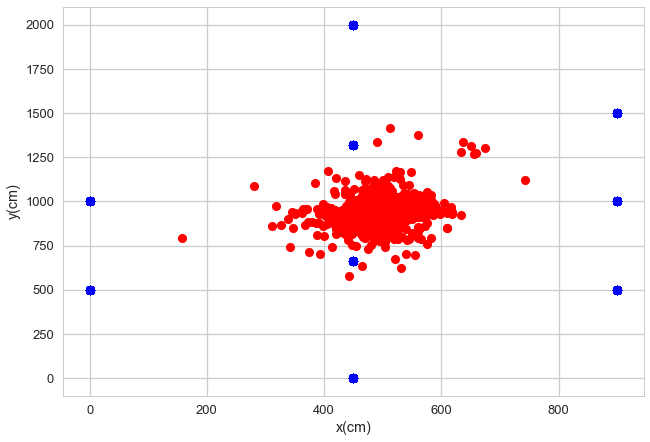

In [93]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge1.pred_x,hoge2.pred_y,"ro")
plt.plot(hoge1.answer_x,hoge2.answer_y,"bo")
plt.savefig("xgboost2.png")

### ランダムフォレスト(分類)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
#hoge_c.columns = ["pred","answer"]

score = len(hoge_c[(hoge_c.pred_x==hoge_c.answer_x) & (hoge_c.pred_y==hoge_c.answer_y)])/len(hoge_c)
#score = len(hoge_c[hoge_c.pred == hoge_c.answer])/len(hoge_c)
print("総合精度:%s" % score)
#hoge_c

総合精度:0.922964318389753


In [77]:
#xの予想
from sklearn import linear_model
model = linear_model.SGDRegressor()
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)
hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

#yの予測
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

ave1 = abs(hoge1.pred_x - hoge1.answer_x).mean()
ave2 = abs(hoge2.pred_y - hoge2.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:8417410327769.561
yの誤差の平均値:13036625918929.033
ユークリッド距離:1.55179383932e+13


/Users/tomanan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### カーネルモデル

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import linear_model

#model = linear_model.LinearRegression()
model = linear_model.Ridge()
#model = linear_model.Lasso(alpha=0.01)
#model = linear_model.ElasticNet(alpha=0.01)
kx = rbf_kernel(train_x,train_x)
KX = rbf_kernel(test_x,train_x)

reg = model.fit(kx,train_y)
pred = reg.predict(KX)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

In [65]:
hoge_r = hoge.where((abs(hoge.pred_x) <= abs(hoge_c.pred_x) + 100) & (abs(hoge.pred_x) >= abs(hoge_c.pred_x) - 100) & (abs(hoge.pred_y) <= abs(hoge_c.pred_y) + 100) & (abs(hoge.pred_y) >= abs(hoge_c.pred_y) - 100))
hoge_r = hoge_r.dropna()
len(hoge_r)

4257

In [47]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:36.77649468407896
yの誤差の平均値:77.13593667816566
ユークリッド距離:85.4544515427


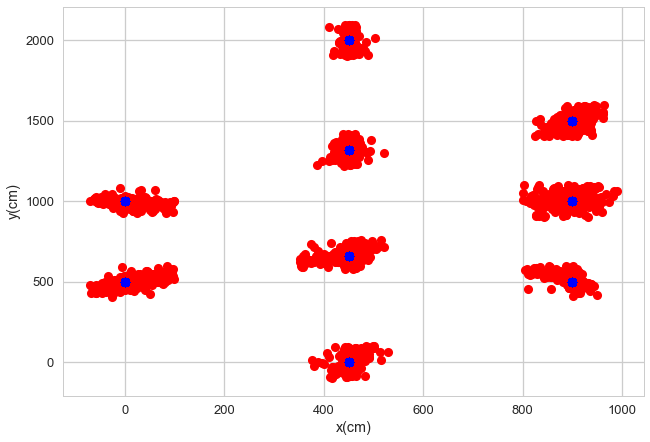

In [66]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge_r.pred_x,hoge_r.pred_y,"ro")
plt.plot(hoge_r.answer_x,hoge_r.answer_y,"bo")
#plt.savefig("lasso2.png")

In [81]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
print("誤差100cm未満の精度:%s" % (b[(b < 100)].count()/hoge.pred_x.count()))
print("誤差200cm未満の精度:%s" % (b[(b < 200)].count()/hoge.pred_x.count()))
print("誤差300cm未満の精度:%s" % (b[(b < 300)].count()/hoge.pred_x.count()))
print("誤差400cm未満の精度:%s" % (b[(b < 400)].count()/hoge.pred_x.count()))
print("誤差500cm未満の精度:%s" % (b[(b < 500)].count()/hoge.pred_x.count()))
print("全体の数:%d" % hoge.pred_x.count())

誤差100cm未満の精度:0.757453813792
誤差200cm未満の精度:0.870678617157
誤差300cm未満の精度:0.922260837754
誤差400cm未満の精度:0.954819828059
誤差500cm未満の精度:0.970916407536
全体の数:5467


In [82]:
a = np.sqrt((hoge_r.pred_x - hoge_r.answer_x)**2 + (hoge_r.pred_y - hoge_r.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge_r.pred_x - hoge_r.answer_x)**2 + (hoge_r.pred_y - hoge_r.answer_y)**2).astype(int)
a.sort()
print("誤差100cm未満の精度:%s" % (b[(b < 100)].count()/hoge_r.pred_x.count()))
print("誤差200cm未満の精度:%s" % (b[(b < 200)].count()/hoge_r.pred_x.count()))
print("誤差300cm未満の精度:%s" % (b[(b < 300)].count()/hoge_r.pred_x.count()))
print("誤差400cm未満の精度:%s" % (b[(b < 400)].count()/hoge_r.pred_x.count()))
print("誤差500cm未満の精度:%s" % (b[(b < 500)].count()/hoge_r.pred_x.count()))
print("全体の数:%d" % hoge_r.pred_x.count())

誤差100cm未満の精度:0.97157622739
誤差200cm未満の精度:0.988489546629
誤差300cm未満の精度:0.988489546629
誤差400cm未満の精度:0.989664082687
誤差500cm未満の精度:0.994597134132
全体の数:4257


### カーネルリッジ

In [14]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=0.1, kernel='rbf')

reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
#hoge

In [110]:
hoge_r = hoge.where((abs(hoge.pred_x) <= abs(hoge_c.pred_x) + 200) & (abs(hoge.pred_x) >= abs(hoge_c.pred_x) - 200) & (abs(hoge.pred_y) <= abs(hoge_c.pred_y) + 200) & (abs(hoge.pred_y) >= abs(hoge_c.pred_y) - 200))
hoge_r = hoge_r.dropna()
len(hoge_r)

1914

In [15]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:68.61572692092419
yの誤差の平均値:96.17085833689688
ユークリッド距離:118.139544498


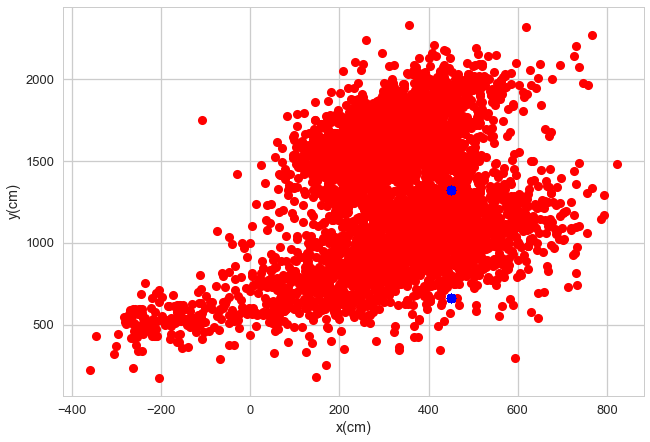

In [120]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge.pred_x,hoge.pred_y,"ro")
plt.plot(hoge.answer_x,hoge.answer_y,"bo")
#plt.savefig("ridge3.png")

In [116]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
print("誤差100cm未満の精度:%s" % (b[(b < 100)].count()/hoge.pred_x.count()))
print("誤差200cm未満の精度:%s" % (b[(b < 200)].count()/hoge.pred_x.count()))
print("誤差300cm未満の精度:%s" % (b[(b < 300)].count()/hoge.pred_x.count()))
print("誤差400cm未満の精度:%s" % (b[(b < 400)].count()/hoge.pred_x.count()))
print("誤差500cm未満の精度:%s" % (b[(b < 500)].count()/hoge.pred_x.count()))
print("全体の数:%d" % hoge.pred_x.count())

誤差100cm未満の精度:0.00576131687243
誤差200cm未満の精度:0.0567901234568
誤差300cm未満の精度:0.153086419753
誤差400cm未満の精度:0.248971193416
誤差500cm未満の精度:0.457818930041
全体の数:4860


In [91]:
a = np.sqrt((hoge_r.pred_x - hoge_r.answer_x)**2 + (hoge_r.pred_y - hoge_r.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge_r.pred_x - hoge_r.answer_x)**2 + (hoge_r.pred_y - hoge_r.answer_y)**2).astype(int)
a.sort()
print("誤差100cm未満の精度:%s" % (b[(b < 100)].count()/hoge_r.pred_x.count()))
print("誤差200cm未満の精度:%s" % (b[(b < 200)].count()/hoge_r.pred_x.count()))
print("誤差300cm未満の精度:%s" % (b[(b < 300)].count()/hoge_r.pred_x.count()))
print("誤差400cm未満の精度:%s" % (b[(b < 400)].count()/hoge_r.pred_x.count()))
print("誤差500cm未満の精度:%s" % (b[(b < 500)].count()/hoge_r.pred_x.count()))
print("全体の数:%d" % hoge_r.pred_x.count())

誤差100cm未満の精度:0.0
誤差200cm未満の精度:0.0
誤差300cm未満の精度:0.0202474690664
誤差400cm未満の精度:0.146606674166
誤差500cm未満の精度:0.547431571054
全体の数:2667


### Ridge

In [117]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

,pred_x,pred_y,answer_x,answer_y
0,372.684726,994.287103,450,660
1,316.712803,1653.949374,450,1320
2,353.613664,2030.254729,450,1320
3,354.848781,1746.459850,450,1320
4,188.004290,821.674325,450,660
5,289.299193,809.034167,450,660
6,403.467124,1862.056042,450,1320
7,146.351828,608.851121,450,660
8,191.274159,1537.181194,450,1320
9,282.328106,1771.259247,450,1320


In [122]:
hoge_r = hoge.where((abs(hoge.pred_x) <= abs(hoge_c.pred_x) + 200) & (abs(hoge.pred_x) >= abs(hoge_c.pred_x) - 200) & (abs(hoge.pred_y) <= abs(hoge_c.pred_y) + 200) & (abs(hoge.pred_y) >= abs(hoge_c.pred_y) - 200))
hoge_r = hoge_r.dropna()
len(hoge_r)

577

In [118]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:157.1368734005615
yの誤差の平均値:339.1595387496528
ユークリッド距離:373.79297707


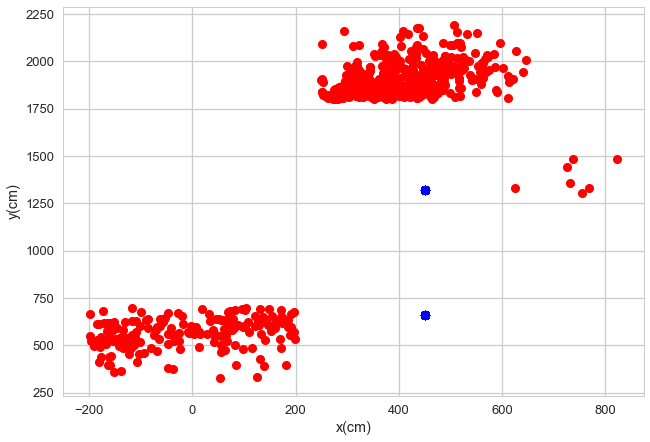

In [123]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge_r.pred_x,hoge_r.pred_y,"ro")
plt.plot(hoge_r.answer_x,hoge_r.answer_y,"bo")
#plt.savefig("ridge3.png")

In [119]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
print("誤差100cm未満の精度:%s" % (b[(b < 100)].count()/hoge.pred_x.count()))
print("誤差200cm未満の精度:%s" % (b[(b < 200)].count()/hoge.pred_x.count()))
print("誤差300cm未満の精度:%s" % (b[(b < 300)].count()/hoge.pred_x.count()))
print("誤差400cm未満の精度:%s" % (b[(b < 400)].count()/hoge.pred_x.count()))
print("誤差500cm未満の精度:%s" % (b[(b < 500)].count()/hoge.pred_x.count()))
print("全体の数:%d" % hoge.pred_x.count())

誤差100cm未満の精度:0.0197530864198
誤差200cm未満の精度:0.0866255144033
誤差300cm未満の精度:0.27304526749
誤差400cm未満の精度:0.535802469136
誤差500cm未満の精度:0.734362139918
全体の数:4860


### 学習データの作成2

In [49]:
train_s = test_s = train.sample(frac=1).reset_index(drop=True)
train_s = train_s.iloc[0:len(train)*3//4]
test_s =  test_s.iloc[len(train)*3//4:len(train)]
#train_s = train_s[(train_s.locate != 4) & (train_s.locate != 5) & (train_s.locate != 7) & (train_s.loacte != 

### ランダムフォレスト(分類)

In [155]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred","answer"]

score = len(hoge[hoge.pred==hoge.answer])/len(hoge)
print("総合精度:%s" % score)
hoge

/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


総合精度:0.9279312237058716


,pred,answer
0,2,2
1,2,9
2,8,8
3,2,2
4,4,4
5,9,9
6,2,2
7,9,9
8,7,7
9,7,7


### XGBoost(分類)

In [156]:
#xgboost
import xgboost as xgb
model = xgb.XGBClassifier()
reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred","answer"]

score = len(hoge[hoge.pred==hoge.answer])/len(hoge)
print("総合精度:%s" % score)
hoge

/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


総合精度:0.9153100420706054


,pred,answer
0,2,2
1,2,9
2,8,8
3,2,2
4,4,4
5,9,9
6,2,2
7,9,9
8,7,7
9,7,7


In [94]:
len(train_x)

18366

In [95]:
from sklearn import svm
model = svm.SVC(kernel="rbf")
#xの予測
from sklearn import svm
model = svm.SVC(kernel="rbf")
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)

hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

#yの予測
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

hoge = pd.concat([hoge1,hoge2],axis=1)

x_score = len(hoge1[hoge1.pred_x==hoge1.answer_x])/len(hoge1)
y_score = len(hoge2[hoge2.pred_y==hoge2.answer_y])/len(hoge2)
ave_score = len(hoge[(hoge.pred_x==hoge.answer_x) & (hoge.pred_y==hoge.answer_y)])/len(hoge)
print("xの精度:%s" % x_score)
print("yの精度:%s" % y_score)
print("総合精度:%s" % ave_score)

xの精度:0.3785725951331047
yの精度:0.20349501878164297
総合精度:0.01633186346562143


In [56]:
df_cali = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset_cali.csv")
df_cali.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

df_cali_1 = df_cali[df_cali.UUIDs == id1]
df_cali_2 = df_cali[df_cali.UUIDs == id2]
df_cali_3 = df_cali[df_cali.UUIDs == id3]
df_cali_4 = df_cali[df_cali.UUIDs == id4]
df_cali_5 = df_cali[df_cali.UUIDs == id5]
df_cali_6 = df_cali[df_cali.UUIDs == id6]
df_cali_7 = df_cali[df_cali.UUIDs == id7]
df_cali_8 = df_cali[df_cali.UUIDs == id8]
df_cali_9 = df_cali[df_cali.UUIDs == id9]
df_cali_10 = df_cali[df_cali.UUIDs == id10]
df_cali_list = [df_cali_1,df_cali_2,df_cali_3,df_cali_4,df_cali_5,df_cali_6,df_cali_7,df_cali_8,df_cali_9,df_cali_10]

In [57]:
for i in range(len(df_cali_list)):
    print("ビーコン%d:%s" % (i+1,df_cali_list[i].RSSI.mean()))

for i in range(len(df_cali_list)):
    print("ビーコン%d:%s" % (i+1,df_cali_list[0].RSSI.mean()-df_cali_list[i].RSSI.mean()))

ビーコン1:-78.06263498920086
ビーコン2:-81.38548752834467
ビーコン3:-84.94666666666667
ビーコン4:-83.15617715617715
ビーコン5:-87.49193548387096
ビーコン6:-85.55555555555556
ビーコン7:-81.31971153846153
ビーコン8:-82.32485875706215
ビーコン9:-82.23665893271462
ビーコン10:-78.45348837209302
ビーコン1:0.0
ビーコン2:3.3228525391438097
ビーコン3:6.8840316774658135
ビーコン4:5.093542166976292
ビーコン5:9.429300494670102
ビーコン6:7.492920566354698
ビーコン7:3.257076549260674
ビーコン8:4.262223767861286
ビーコン9:4.17402394351376
ビーコン10:0.39085338289216054


In [58]:
for i in range(len(df_cali_list)):
    print("ビーコン%d:%s" % (i+1,df_cali_list[0].RSSI.mean()/df_cali_list[i].RSSI.mean()))

ビーコン1:1.0
ビーコン2:0.959171436578462
ビーコン3:0.9189605437435354
ビーコン4:0.9387472784203389
ビーコン5:0.8922266327459588
ビーコン6:0.9124204089646853
ビーコン7:0.9599472687784907
ビーコン8:0.9482267709630822
ビーコン9:0.9492437557935213
ビーコン10:0.9950180241694493


In [99]:
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 10,train[["dev1","dev2","dev3","dev4"]]*) 

In [100]:
train

,dev1,dev2,dev3,dev4,time,locate,x,y,cluster
10,-91.000000,-73.333333,-86.000000,-81.000000,5,1,0,1500,0
12,-92.000000,-76.000000,-82.333333,-84.000000,6,1,0,1500,0
14,-90.500000,-76.000000,-82.666667,-83.000000,7,1,0,1500,0
16,-91.000000,-76.000000,-83.000000,-82.000000,8,1,0,1500,0
18,-91.333333,-75.000000,-86.000000,-81.000000,9,1,0,1500,0
20,-91.000000,-75.500000,-83.500000,-83.500000,10,1,0,1500,0
22,-90.666667,-73.000000,-79.500000,-84.500000,11,1,0,1500,0
24,-90.000000,-74.750000,-79.666667,-83.333333,12,1,0,1500,0
26,-92.000000,-76.500000,-79.083333,-82.166667,13,1,0,1500,0
28,-92.000000,-76.500000,-78.500000,-81.000000,14,1,0,1500,0


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

